# Data Cleaning

**Research:**

**BMI**
- Plausible Minimum BMI: 12. This is the lower bound for BMI, where survival is possible but associated with extreme underweight and significant health risks.
- Plausible Maximum BMI: 70. This represents the upper bound, typically seen in extreme cases of severe obesity, with significant health risks and medical complications.

**HbA1c_level**
- Normal Range: Below 5.7%
- Pre-diabetes: 5.7% to 6.4%
- Diabetes: 6.5% or higher.

**Plausible Ranges for blood_glucose_level:**
- Minimum value: Around 40 mg/dL (2.2 mmol/L), though such low levels would indicate hypoglycemia, which is a medical emergency.
- Maximum value: Up to 600 mg/dL (33.3 mmol/L) or more, though values this high are typically seen in severe cases of uncontrolled diabetes.

# Import Packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read data

In [5]:
data = pd.read_csv("../artifacts/data/diabetes_prediction_dataset.csv")

In [ ]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


# check data types

In [ ]:
data.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

- Convert age to integer

In [ ]:
data["age"] = data["age"].astype(int)

# Check for missing values

In [ ]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

# Remove duplcate

In [ ]:
data = data.drop_duplicates(keep = "first")

# Descriptive statistics for numerical features

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,96112.0,41.798287,22.472901,0.00,24.0,43.00,59.00,80.00
hypertension,96112.0,0.077628,0.267587,0.00,0.0,0.00,0.00,1.00
heart_disease,96112.0,0.040817,0.197867,0.00,0.0,0.00,0.00,1.00
bmi,96112.0,27.321923,6.768534,10.01,23.4,27.32,29.86,95.69
HbA1c_level,96112.0,5.532618,1.073288,3.50,4.8,5.80,6.20,9.00
blood_glucose_level,96112.0,138.221013,40.911287,80.00,100.0,140.00,159.00,300.00
diabetes,96112.0,0.088251,0.283661,0.00,0.0,0.00,0.00,1.00


**Observations**
- The minimum age recorded is 0.0 years, while the maximum is 80 years. The extremely low minimum age warrants further investigation for data entry errors.
- The minimum BMI is 10, which is significantly below the plausible range for a healthy human. This suggests a potential data entry error or outlier.
- The maximum BMI is 90, which exceeds the plausible upper limit, indicating the presence of an outlier.
- The minimum HbA1c level is 3.5%, which is lower than expected, suggesting it could be an inaccurate measurement or error.
- The maximum HbA1c level of 9% may be considered an outlier depending on the population under study.

Outlier removal is a possible solution

## Create Box and histogram plot for each numerical feature

In [ ]:
# investigate age against BMI to identify outliers
def create_box_histplot(data_frame,columns= [] ,hist = False, box = False):
    # make a copy of dataframe
    df = data_frame.copy()

    # number of columns for subplot is same as number of features
    ncolumns = len(columns)
    # Set number of columns and dynamic figure size
    subplot_width = 5  # Set desired width per subplot
    subplot_height = 5  # Set desired height per subplot
    figsize = (ncolumns * subplot_width, subplot_height)     
    fig, axes = plt.subplots(nrows=1, ncols=ncolumns,figsize = figsize)
    
    for index, feature in enumerate(columns):
        if hist == True:
            sns.histplot(data = df[feature], ax = axes[index])
        if box == True:
            sns.boxplot(data = df[feature], ax=axes[index])
    plt.tight_layout()
    plt.show()

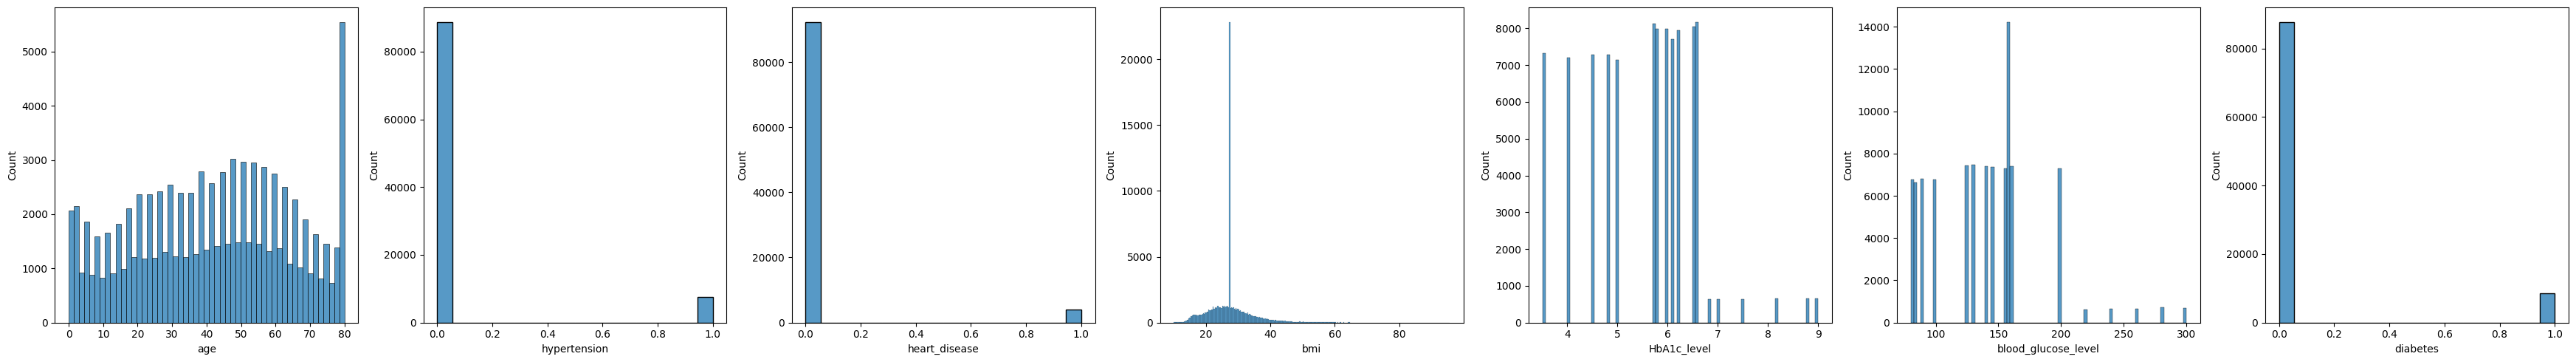

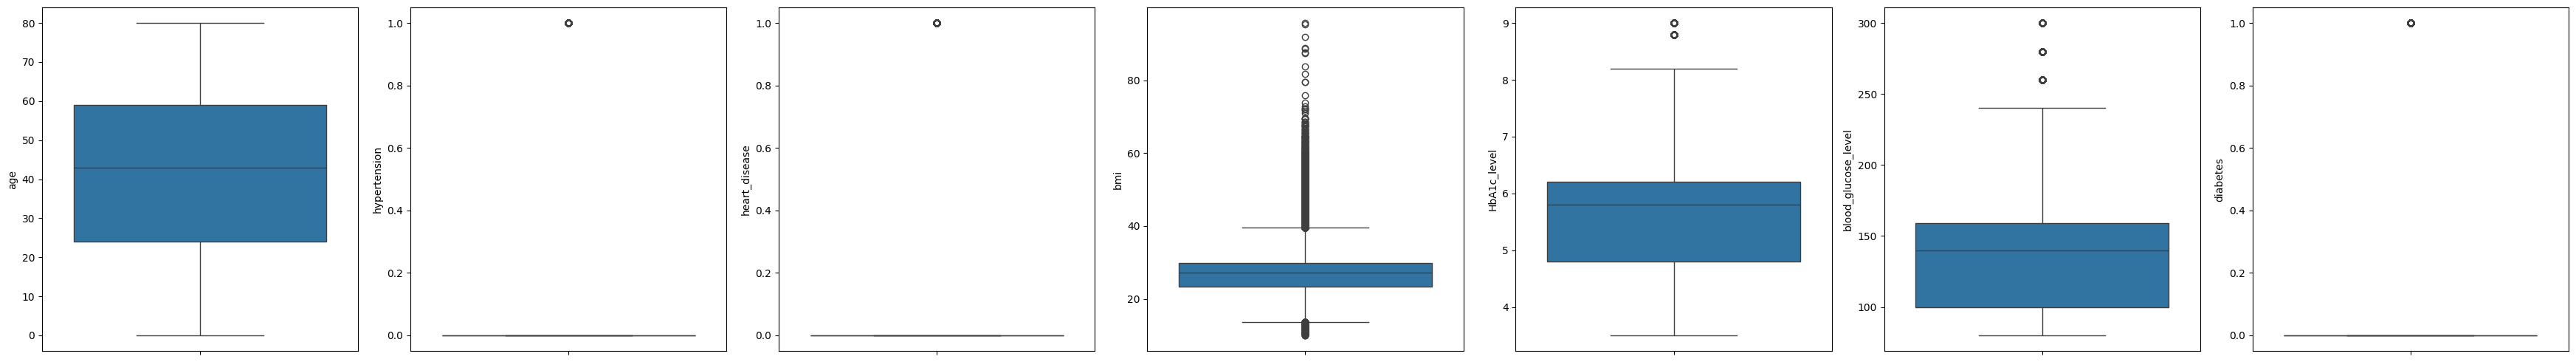

In [ ]:
create_box_histplot(data_frame=data, columns = data.select_dtypes(exclude = 'object').columns.to_list(),hist = True)
create_box_histplot(data_frame=data, columns = data.select_dtypes(exclude = 'object').columns.to_list(), box= True)

**Observations**
- Outliers are present on **BMI**, **Blood glucose level** and **diabetes.**

In [ ]:
# write a fuction to calculate outliers
def find_outliers(data_frame,feature, upper = False, lower = False):
    target_feature = "diabetes"
    # make a copy of dataframe
    df = data_frame.copy()
     
    # calculate Q1 and Q3 and IQR
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    # find lower and upper bound
    if lower == True:
        lower_bound = Q1 - (IQR *1.5)
        outlier_df = df[df[feature] < lower_bound]
        print(f"lower bound of {feature} is: {lower_bound}")
    if upper == True:
        upper_bound = Q3 + (IQR * 1.5)
        outlier_df = df[df[feature] > upper_bound]
        print(f"Upper bound of {feature} is: {upper_bound}")
        
    print(f"the size of the data that are outliers is {outlier_df.shape}\n")
    print(f"distribution of target features in outlier is {outlier_df[target_feature].value_counts()}")

In [ ]:
# find upper outliers for BMI

find_outliers(data_frame=data, feature="bmi", upper=True)

Upper bound of bmi is: 39.55
the size of the data that are outliers is (4940, 9)

distribution of target features in outlier is diabetes
0    3681
1    1259
Name: count, dtype: int64


In [ ]:
# find lower outliers for BMI

find_outliers(data_frame=data, feature="bmi", lower=True)

lower bound of bmi is: 13.709999999999997
the size of the data that are outliers is (414, 9)

distribution of target features in outlier is diabetes
0    406
1      8
Name: count, dtype: int64


- Removing all outliers in this case might result in significant loss of information, looking at the number of records classified as outliers and the distribution of target feature

In [ ]:
# find outliers in HbA1c_level

find_outliers(data_frame=data, feature="HbA1c_level", upper=True)

Upper bound of HbA1c_level is: 8.3
the size of the data that are outliers is (1312, 9)

distribution of target features in outlier is diabetes
1    1312
Name: count, dtype: int64


- Over 1000 records fall above the upper bound
- All patients within this category are diabetic. Therefor removing outliers above the upper bound will result in significant information loss

In [ ]:
# Find outliers in blood glucose level

find_outliers(data_frame=data, feature="blood_glucose_level", upper=True)

Upper bound of blood_glucose_level is: 247.5
the size of the data that are outliers is (2031, 9)

distribution of target features in outlier is diabetes
1    2031
Name: count, dtype: int64


- Over 2000 records fall above the upper bound
- All patients above the upper bound of blood_glucose_level are **diabetic**, suggesting that altering that value will result in significant information loss

# Inspect categorical features

In [ ]:
# select categorical features from data
categorical_df = data.select_dtypes(include = "object")
categorical_df.head()

,gender,smoking_history
0,Female,never
1,Female,No Info
2,Male,never
3,Female,current
4,Male,current


In [ ]:
cat_list = categorical_df.columns.to_list()

for feature in cat_list:
    print(categorical_df[feature].value_counts(),"\n")

gender
Female    56142
Male      39952
Other        18
Name: count, dtype: int64 

smoking_history
never          34398
No Info        32853
former          9299
current         9197
not current     6367
ever            3998
Name: count, dtype: int64 



**Obsevatios**
- Wrong gender category "Others"
- Similar smoking history: fomer, not current, ever

## reassign "other" in gender cateogry to the mode of that feature (female)

In [ ]:
data["gender"] = data["gender"].replace("Other", "Female")

In [ ]:
data["gender"].value_counts()

gender
Female    56160
Male      39952
Name: count, dtype: int64

## Convert Gender to all lower case

In [ ]:
data["gender"] = data["gender"].str.lower()

## Group "former", "not current" and "ever" into a single category called "past_smoker"

In [ ]:
data["smoking_history"] = data["smoking_history"].replace({"former":"past_smoker",
                                                           "not current": "past_smoker",
                                                          "ever": "past_smoker"})

In [ ]:
data["smoking_history"].value_counts()

smoking_history
never          34398
No Info        32853
past_smoker    19664
current         9197
Name: count, dtype: int64

## Convert Gender to all lower case

In [ ]:
data["smoking_history"] = data["smoking_history"].str.lower()

## Check for relationship between age, BMI and smoking history

Patients below the age 10 with smoking history

In [ ]:
below_adolescence = data[data["age"] <= 10]

In [ ]:
below_adolescence["smoking_history"].value_counts()

smoking_history
no info        8757
never          1288
past_smoker     226
current          21
Name: count, dtype: int64

In [ ]:
below_adolescence[below_adolescence["smoking_history"] == "past_smoker"]["diabetes"].value_counts()

diabetes
0    224
1      2
Name: count, dtype: int64

In [ ]:
below_adolescence[below_adolescence["smoking_history"] == "current"]["diabetes"].value_counts()

diabetes
0    21
Name: count, dtype: int64

**Reasons to Remove These Records:**
Biological Implausibility: It is highly unlikely for children under 10 to have a legitimate smoking history, making these records suspect.

Inconsistent with Target Feature: The fact that just 2 of these children are diabetic could indicate a lack of correlation between smoking history and the target outcome (diabetes) in this age group. This inconsistency suggests these records do not contribute meaningful information to the model.

Data Integrity: Retaining implausible records could introduce noise and reduce model performance. Removing them is likely to lead to a more accurate and reliable model.

In [ ]:
# Filter and drop records where age is 10 or below and smoking history is either "current" or "past_smoker"
filtered_data = data[~((data["age"] <= 10) & 
                      (data["smoking_history"].isin(["current", "past_smoker"])))]

In [ ]:
# check if the filer took effect
filtered_data[filtered_data["age"] <=10]["smoking_history"].unique()

array(['no info', 'never'], dtype=object)

# Save final data

In [ ]:
filtered_data.to_csv("../data/Clean_data.csv", index = False)

In [ ]:
filtered_data.dtypes

gender                  object
age                      int32
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object